# Car Make and Model Recognizer
I shall explore here my tries to reach a good optimizer

## Importing Libraries

In [1]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Flatten, Dense, BatchNormalization, Activation, PReLU, LeakyReLU
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from glob import glob
from keras import regularizers
from keras.layers.advanced_activations import PReLU

Using TensorFlow backend.


## Pre-Processing

### Data Augmentation

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.25,
                                   rotation_range = 90,
                                   horizontal_flip=True,
                                  validation_split = 0.3)
#test_datagen = ImageDataGenerator(rescale=1./255,
 #                                horizontal_flip = True)

train_data = train_datagen.flow_from_directory('My_Cars/trainCropped',
                                              target_size=(128, 128),
                                              batch_size=32,
                                              class_mode='categorical',
                                              subset='training')
test_data = train_datagen.flow_from_directory('My_Cars/trainCropped',
                                              target_size=(128, 128),
                                              batch_size=32,
                                              class_mode='categorical',
                                            subset='validation')

Found 5796 images belonging to 196 classes.
Found 2348 images belonging to 196 classes.


## Model

In [7]:
model = Sequential()


### TODO: Define your architecture.
model.add(Conv2D(filters=32, kernel_size=4, strides=1,kernel_initializer = 'random_normal', padding='same', input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(LeakyReLU())
#act = PReLU(weights=None, alpha_initializer="zero")
#model.add(act)
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(filters=128, kernel_size=2, strides=1,kernel_initializer = 'random_normal', padding='same')) 
model.add(BatchNormalization())
#model.add(Activation("relu"))
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(filters=256, kernel_size=2, strides=1,kernel_initializer = 'random_normal', padding='same'))
model.add(BatchNormalization())
#model.add(Activation("relu"))
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Dropout(0.5))

model.add(Conv2D(filters=512, kernel_size=2, strides=1,kernel_initializer = 'random_normal', padding='same'))
model.add(BatchNormalization())
#model.add(Activation("relu"))
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Dropout(0.5))

model.add(Conv2D(filters=512, kernel_size=2, strides=1,kernel_initializer = 'random_normal',padding='same'))
model.add(BatchNormalization())
#model.add(Activation("relu"))
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Dropout(0.5))

model.add(GlobalAveragePooling2D())

model.add(Dense(196, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 32)      1568      
_________________________________________________________________
batch_normalization_6 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 128)       16512     
_________________________________________________________________
batch_normalization_7 (Batch (None, 64, 64, 128)       512       
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 64, 64, 128)       0         
__________

### Train

In [9]:
from keras.callbacks import ModelCheckpoint  

### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 200

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='Saved_Models/weights.best.from_scratch39.hdf5', 
                               verbose=1, save_best_only=True)

Saving = model.fit_generator(train_data,
          steps_per_epoch=182,  
          epochs=epochs,
          verbose=1, 
          validation_data=test_data,
          validation_steps=74,
          callbacks=[checkpointer])
# model.fit(train_data, test_data,
#                   callbacks = [checkpointer],
#                   validation_split = 0.33,
#                   epochs=epochs,
#           batch_size = 20,
#           verbose=1)

Epoch 1/200
182/182 [==============================] - 64s 351ms/step - loss: 5.5002 - acc: 0.0110 - val_loss: 6.4994 - val_acc: 0.0098

Epoch 00001: val_loss improved from inf to 6.49935, saving model to Saved_Models/weights.best.from_scratch39.hdf5
Epoch 2/200
182/182 [==============================] - 59s 322ms/step - loss: 5.2231 - acc: 0.0158 - val_loss: 5.9761 - val_acc: 0.0124

Epoch 00002: val_loss improved from 6.49935 to 5.97610, saving model to Saved_Models/weights.best.from_scratch39.hdf5
Epoch 3/200
182/182 [==============================] - 59s 323ms/step - loss: 5.1315 - acc: 0.0191 - val_loss: 6.4776 - val_acc: 0.0115

Epoch 00003: val_loss did not improve from 5.97610
Epoch 4/200
182/182 [==============================] - 59s 324ms/step - loss: 5.0519 - acc: 0.0316 - val_loss: 5.2406 - val_acc: 0.0268

Epoch 00004: val_loss improved from 5.97610 to 5.24059, saving model to Saved_Models/weights.best.from_scratch39.hdf5
Epoch 5/200
182/182 [==============================

182/182 [==============================] - 65s 359ms/step - loss: 3.9083 - acc: 0.1514 - val_loss: 5.4223 - val_acc: 0.0541

Epoch 00040: val_loss did not improve from 4.59010
Epoch 41/200
182/182 [==============================] - 66s 363ms/step - loss: 3.8877 - acc: 0.1566 - val_loss: 5.0828 - val_acc: 0.0618

Epoch 00041: val_loss did not improve from 4.59010
Epoch 42/200
182/182 [==============================] - 63s 348ms/step - loss: 3.8815 - acc: 0.1593 - val_loss: 4.8570 - val_acc: 0.0741

Epoch 00042: val_loss did not improve from 4.59010
Epoch 43/200
182/182 [==============================] - 62s 339ms/step - loss: 3.8595 - acc: 0.1600 - val_loss: 4.9669 - val_acc: 0.0716

Epoch 00043: val_loss did not improve from 4.59010
Epoch 44/200
182/182 [==============================] - 63s 345ms/step - loss: 3.8512 - acc: 0.1617 - val_loss: 4.5433 - val_acc: 0.0954

Epoch 00044: val_loss improved from 4.59010 to 4.54335, saving model to Saved_Models/weights.best.from_scratch39.hdf5
E

182/182 [==============================] - 58s 320ms/step - loss: 3.1780 - acc: 0.2684 - val_loss: 4.5023 - val_acc: 0.1205

Epoch 00080: val_loss did not improve from 3.96592
Epoch 81/200
182/182 [==============================] - 58s 320ms/step - loss: 3.1869 - acc: 0.2694 - val_loss: 4.1619 - val_acc: 0.1367

Epoch 00081: val_loss did not improve from 3.96592
Epoch 82/200
182/182 [==============================] - 58s 319ms/step - loss: 3.1644 - acc: 0.2704 - val_loss: 5.2832 - val_acc: 0.0882

Epoch 00082: val_loss did not improve from 3.96592
Epoch 83/200
182/182 [==============================] - 58s 320ms/step - loss: 3.1529 - acc: 0.2768 - val_loss: 4.0768 - val_acc: 0.1465

Epoch 00083: val_loss did not improve from 3.96592
Epoch 84/200
182/182 [==============================] - 58s 321ms/step - loss: 3.1202 - acc: 0.2864 - val_loss: 6.9658 - val_acc: 0.0639

Epoch 00084: val_loss did not improve from 3.96592
Epoch 85/200
182/182 [==============================] - 58s 321ms/st


Epoch 00121: val_loss did not improve from 3.68624
Epoch 122/200
182/182 [==============================] - 63s 344ms/step - loss: 2.6810 - acc: 0.3565 - val_loss: 5.0217 - val_acc: 0.1167

Epoch 00122: val_loss did not improve from 3.68624
Epoch 123/200
182/182 [==============================] - 63s 346ms/step - loss: 2.6615 - acc: 0.3522 - val_loss: 3.8993 - val_acc: 0.2049

Epoch 00123: val_loss did not improve from 3.68624
Epoch 124/200
182/182 [==============================] - 62s 340ms/step - loss: 2.6883 - acc: 0.3561 - val_loss: 5.2285 - val_acc: 0.1022

Epoch 00124: val_loss did not improve from 3.68624
Epoch 125/200
182/182 [==============================] - 61s 336ms/step - loss: 2.6598 - acc: 0.3613 - val_loss: 4.3585 - val_acc: 0.1457

Epoch 00125: val_loss did not improve from 3.68624
Epoch 126/200
182/182 [==============================] - 62s 341ms/step - loss: 2.6477 - acc: 0.3681 - val_loss: 4.0034 - val_acc: 0.1810

Epoch 00126: val_loss did not improve from 3.6862

182/182 [==============================] - 63s 347ms/step - loss: 2.3205 - acc: 0.4382 - val_loss: 8.8530 - val_acc: 0.0549

Epoch 00164: val_loss did not improve from 3.36924
Epoch 165/200
182/182 [==============================] - 64s 351ms/step - loss: 2.3439 - acc: 0.4315 - val_loss: 4.1889 - val_acc: 0.1405

Epoch 00165: val_loss did not improve from 3.36924
Epoch 166/200
182/182 [==============================] - 65s 356ms/step - loss: 2.2823 - acc: 0.4384 - val_loss: 4.2573 - val_acc: 0.1640

Epoch 00166: val_loss did not improve from 3.36924
Epoch 167/200
182/182 [==============================] - 63s 349ms/step - loss: 2.2968 - acc: 0.4372 - val_loss: 4.6740 - val_acc: 0.1371

Epoch 00167: val_loss did not improve from 3.36924
Epoch 168/200
182/182 [==============================] - 63s 345ms/step - loss: 2.3068 - acc: 0.4354 - val_loss: 3.7395 - val_acc: 0.2057

Epoch 00168: val_loss did not improve from 3.36924
Epoch 169/200
182/182 [==============================] - 67s 368

In [10]:

vals = pd.DataFrame.from_dict(Saving.history)
vals = pd.concat([pd.Series(range(0,100),name='epochs'),vals],axis=1)
vals.head(n=31)

,epochs,val_loss,val_acc,loss,acc
0,0.0,6.499353,0.009796,5.503047,0.011042
1,1.0,5.976105,0.012351,5.222635,0.015873
2,2.0,6.477563,0.011499,5.126511,0.019151
3,3.0,5.240590,0.026831,5.049148,0.030538
4,4.0,5.436804,0.025128,4.987711,0.029158
5,5.0,5.364198,0.026831,4.947073,0.033126
6,6.0,5.224251,0.018313,4.898241,0.036922
7,7.0,5.086006,0.036627,4.846675,0.039337
8,8.0,4.967881,0.037905,4.806927,0.043651
9,9.0,5.034413,0.034923,4.742197,0.051932


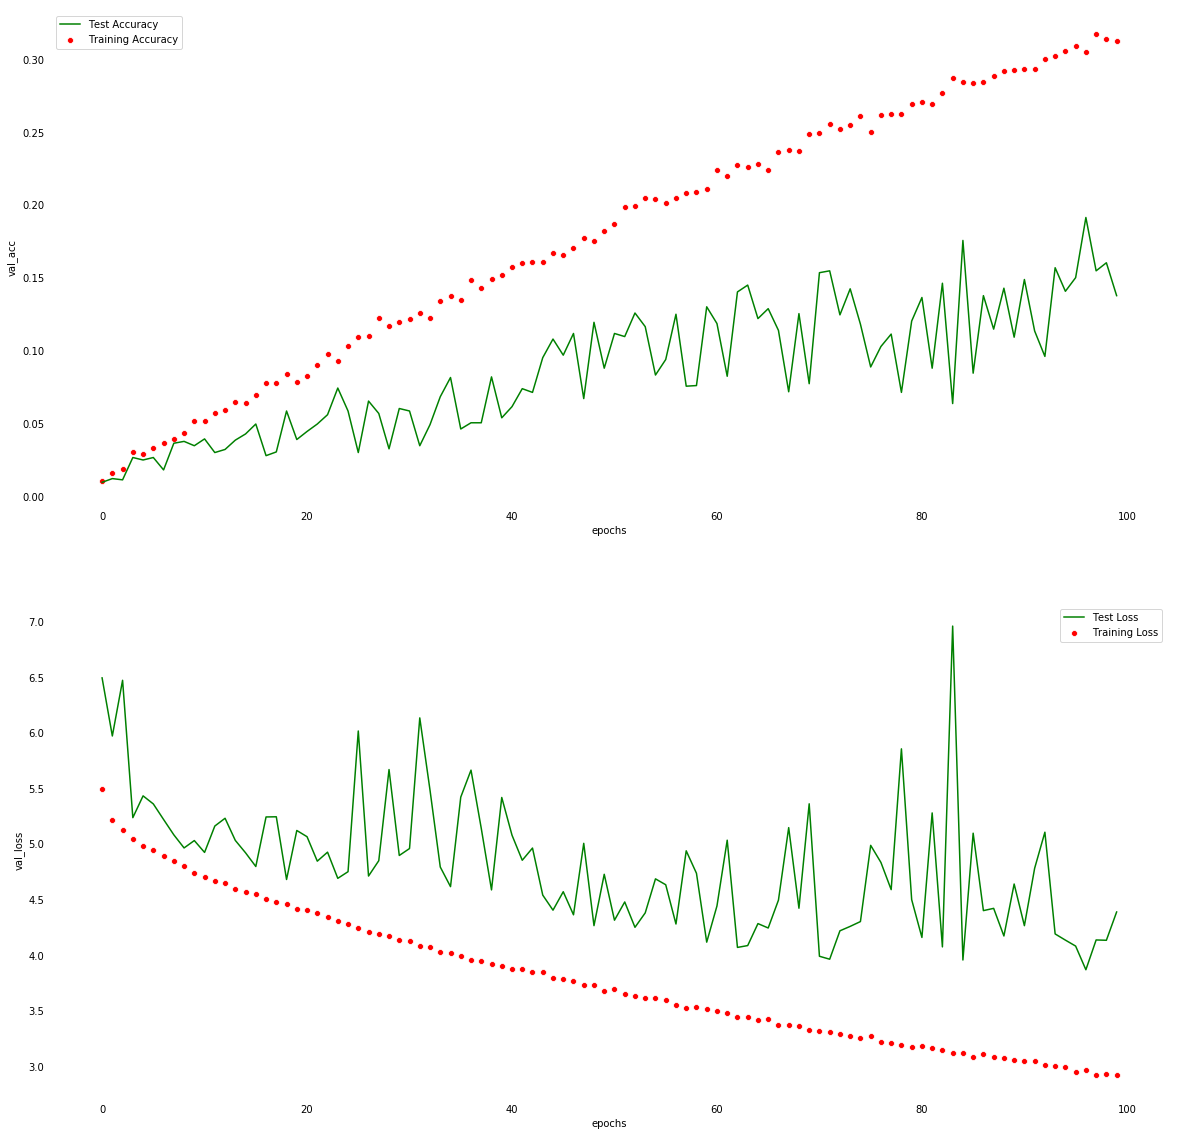

In [11]:
import seaborn as sns
sns.set_style({'xtick.bottom':False,
               'ytick.left':False,
               'axes.spines.bottom': False,
               'axes.spines.left': False,
               'axes.spines.right': False,
               'axes.spines.top': False})

ig,(ax,ax1) = plt.subplots(nrows=2,ncols=1,figsize=(20,20))
sns.scatterplot(x='epochs',y='acc',data=vals,ax=ax,color='r')
sns.lineplot(x='epochs',y='val_acc',data=vals,ax=ax,color='g')
sns.scatterplot(x='epochs',y='loss',data=vals,ax=ax1,color='r')
sns.lineplot(x='epochs',y='val_loss',data=vals,ax=ax1,color='g')
ax.legend(labels=['Test Accuracy','Training Accuracy'])
ax1.legend(labels=['Test Loss','Training Loss'])

In [ ]:
# for i in range(n_iterations):
#         print('\r{}/{}'. format(i, n_iterations))
#         #initilaize random hyperparameters
#         random_parameters = {K: random.sample(V, 1)[0] for K, V in parameters_grid.items()}
#         #create model with random hyperparameters
#         model = create_model(random_parameters)
#         opt = create_RMSprop_optimizer(random_parameters)
#         #compile model
#         model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['accuracy'])
#         #train model
#         epochs = 40
#         checkpointer = ModelCheckpoint(filepath='saved_models/model_weights.hdf5', verbose=1, save_best_only=True)
#         early_stopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 8)
#         history = model.fit(X_train, Y_train,
#                   callbacks = [checkpointer, early_stopping],
#                   validation_split = 0.33,
#                   epochs=epochs, batch_size = 20, verbose=1)
#         #compare current min validation loss with global min validation loss
#         current_min_val_loss = np.min(history.history['val_loss'])
#         if(current_min_val_loss < global_min_val_loss):
#             global_min_val_loss = current_min_val_loss
#             #save the best model so far
#             model.load_weights('saved_models/model_weights.hdf5')
#             model.save('saved_models/best_model.h5')
#             print('saving new best model, val_loss = {}'.format(current_min_val_loss))
#             #save best hyperparameters
#             best_hyperparameters = random_parameters